# Assignment 5: Complex numbers and Fourier transform

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import cv2

## Question 1: Complex exponent

Complex exponent is the complex version of the library function `exp`. 

1. Implement complex exponent using real-valued functions from the `numpy` library. Use Euler's formula for the exponent of a complex number.

In [50]:
def cexp(z):
  return ((np.exp(1)**z.real)*(np.cos(z.imag) + 1j*(np.sin(z.imag))))

2. Using [Axes3d.plot_surface](https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html#surface-plots), plot the real and the imaginary parts of $\exp(z)$ for range $\mathcal{R}(z) \in [-2, 2]$, $\mathcal{I}(z) \in [0, 2\pi]$.

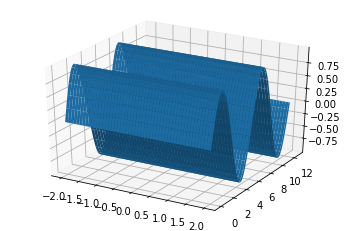

In [51]:
# example - with 3d sin wave
x = np.linspace(-2,2,100)
y = np.linspace(0, 4*np.pi, 100)
x_1, y_1 = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x_1, y_1, np.sin(y_1))


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/axes3d.py:1642: ComplexWarning: Casting complex values to real discards the imaginary part
  v1[poly_i, :] = ps[i1, :] - ps[i2, :]
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/axes3d.py:1643: ComplexWarning: Casting complex values to real discards the imaginary part
  v2[poly_i, :] = ps[i2, :] - ps[i3, :]
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


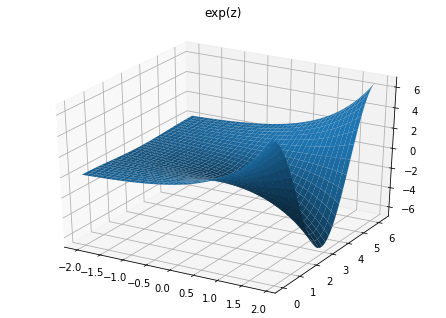

In [52]:
fig = plt.figure()
ax = Axes3D(fig)

x = np.arange(-2, 2,0.1)
y = np.arange( 0, 2*np.pi,0.1)

X, Y = np.meshgrid(x, y)
Z = X + Y*1j

exp_value = cexp(Z)
ax.title.set_text("exp(z)")
ax.plot_surface(X, Y, exp_value)
plt.show()

3. Similarly, plot the magnitude and the phase of $\exp(z)$, for the same range.  
We define the magnitude and phase of $z=a+i\cdot b$:
\begin{align}
        magnitude(z) = \sqrt{a^2+b^2} \\ 
        phase(z) = \arctan({\frac{b}{a}})
    \end{align}
You can use [np.abs](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html) and [np.angle](https://numpy.org/doc/stable/reference/generated/numpy.angle.html) to compute those.

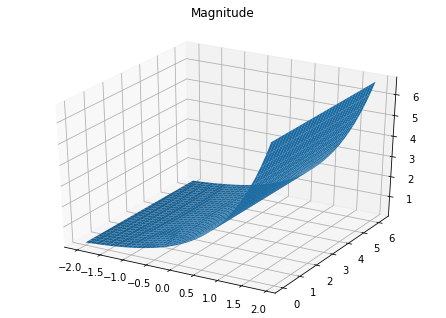

In [53]:
fig = plt.figure()
ax = Axes3D(fig)

exp_magn = np.abs(exp_value)

ax.title.set_text("Magnitude")
ax.plot_surface(X, Y, exp_magn)
plt.show()

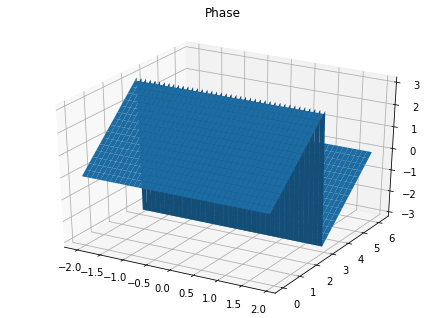

In [54]:
fig = plt.figure()
ax = Axes3D(fig)

exp_phas = np.angle(exp_value)

ax.title.set_text("Phase")
ax.plot_surface(X, Y, exp_phas)
plt.show()

4. Find the maximum and minimum magnitude and phase of $exp(z - \overline z)$ ($\overline z$ is the conjugate of $z$), for the same range.

In [55]:
exp_value = cexp(Z - np.conj(Z))

exp_magn = np.abs(exp_value)
exp_phas = np.angle(exp_value)

print("Maximum Magnitude: ", exp_magn.max())
print("Minimum Magnitude: ", exp_magn.min())

print("Maximum Phase: ", exp_phas.max())
print("Minimum Phase: ", exp_phas.min())

Maximum Magnitude:  1.0
Minimum Magnitude:  0.9999999999999999
Maximum Phase:  3.1168146928204137
Minimum Phase:  -3.0831853071795865


5. Find the maximum and minimum of the real and imaginary parts of $\exp(z\cdot \overline z)$, for the same range.

In [56]:
exp_value = cexp(Z * np.conj(Z))

exp_real = exp_value.real
exp_imag = exp_value.imag

print("Maximum Real: ", exp_real.max())
print("Minimum Real: ", exp_real.min())

print("Maximum Imag: ", exp_imag.max())
print("Minimum Imag: ", exp_imag.min())

Maximum Real:  2.700584756674771e+18
Minimum Real:  1.0
Maximum Imag:  0.0
Minimum Imag:  0.0


## Question 2: Image processing with Fourier transform

After performing in 2022 student fest, the singer Lena-Lee tried to get back on stage for her encore. Unfortunately she got stuck behind a fence. 
In this exercise we will help Lena-Lee by moving the fence using the Fourier transform. 


*1*. Load and display the provided LenaLee.png

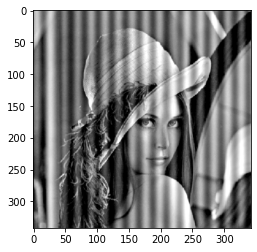

In [57]:
img = cv2.imread('LenaLee.png',0) # Reads the original grayscale image
if img is None:
    raise Exception("Couldnt load image, make sure you uploaded it.")
plt.imshow(img,cmap='gray')

2. Compute the image’s DFT using the [numpy.fft.fft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html) function. Shift the zero-frequency component to the center of the spectrum using [numpy.fft.fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html). 
*Note* - The fftshift usually used for visualization. Now we can see also the negative frequencies components, and at the center of the image(image.width//2, image.height//2), we can find the zero-frequency component.

In [58]:
im = np.fft.fft2(img)
im_shift = np.fft.fftshift(im)

3. Display the amplitude spectrum of the image.
*Note* - The output of [numpy.fft.fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html) is complex array, to get the amplitude we use np.abs.  
For visualization it is recommended to display $20 * \log(abs(output)+1)$ instead.   

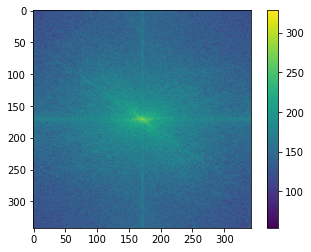

In [59]:
def plot_spectrum(im_fft):
    # A logarithmic colormap
    plt.imshow(20*np.log(np.abs(im_fft)+1))
    plt.colorbar()

plot_spectrum(im_shift)

4. Filter out the signal which creates the bars of the fence.  
*Hint 1* - Are the bars have low frequency or high frequency?  
*Hint 2* - A signal is represented with two symmetric points in the spectrum.  
*Hint 3* - As one can see, the sinusoidal noise is horizontal. That means the vertical component of the noise function is zero, and the two points represnting the noise located at the middle row of the image.  

In [60]:
keep_fraction = 0.1
im_fft2 = im_fft.copy()
im_fft_noise = im_fft.copy()
r, c = im_fft2.shape
im_fft2[:int(r*(1-keep_fraction)), ] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

5. Apply the inverse DFT on the filtered Fourier spectrum using [numpy.fft.ifft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html) and [numpy.fft.ifftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifftshift.html). Display the output(for displaying use the absolute value of the image). 

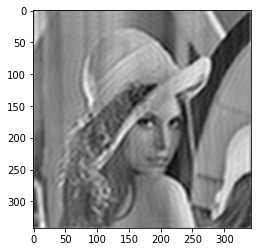

In [61]:
im_new = fftpack.ifft2(im_fft2).real
plt.figure()
plt.imshow(im_new, plt.cm.gray)